In [1]:
import pandas as pd
from os import path 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#create dataframe from the csv file
df=pd.read_csv("sfpd_dispatch_data_subset.csv")

In [3]:
#convert received_timestamp to datetime
df.received_timestamp=pd.to_datetime(df.received_timestamp)
df.dtypes

call_number                                int64
unit_id                                   object
incident_number                            int64
call_type                                 object
call_date                                 object
watch_date                                object
received_timestamp                datetime64[ns]
entry_timestamp                           object
dispatch_timestamp                        object
response_timestamp                        object
on_scene_timestamp                        object
transport_timestamp                       object
hospital_timestamp                        object
call_final_disposition                    object
available_timestamp                       object
address                                   object
city                                      object
zipcode_of_incident                        int64
battalion                                 object
station_area                               int64
box                 

In [4]:
#create a temp dataframe to hold values for graph
dates = pd.DataFrame(df['received_timestamp'])  

bins = [0, 5, 13, 17, 25] # arranging time of day into bins of time by hour
labels = ['Morning','Afternoon','Evening','Night']
hours = dates['received_timestamp'].dt.hour
dates['Time of Day'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)

In [5]:
dates["Date"]=df.received_timestamp.dt.date

In [6]:
dates

,received_timestamp,Time of Day,Date
0,2018-01-24 17:36:16,Afternoon,2018-01-24
1,2018-01-24 07:05:05,Morning,2018-01-24
2,2018-01-24 02:04:21,Night,2018-01-24
3,2018-01-24 20:04:15,Evening,2018-01-24
4,2018-01-24 20:03:08,Evening,2018-01-24
5,2018-01-24 21:18:56,Evening,2018-01-24
6,2018-01-24 12:24:27,Afternoon,2018-01-24
7,2018-01-24 19:51:29,Evening,2018-01-24
8,2018-01-24 22:26:22,Night,2018-01-24
9,2018-01-24 10:35:00,Afternoon,2018-01-24


In [7]:
#create a column called "Date" that  holds the x axis labels
dates["Date"]=dates.received_timestamp.dt.date


In [8]:
#sort the data by date
dates.set_index("received_timestamp", inplace=True)


In [9]:
dates.sort_index(inplace=True)

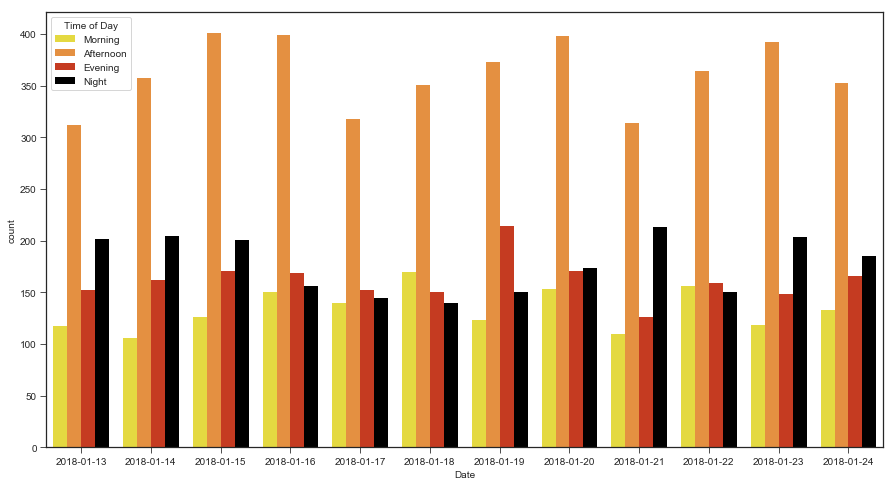

In [14]:

sns.set_style('ticks',{'legend.frameon':True})
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x="Date", data=dates, hue='Time of Day',  
              palette=dict(Morning="#fff026", Afternoon="#ff8f26", Evening="#e02806", Night="#000000"))
# plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title